In [2]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/16/51/58b0b9de42fe1e665736d9286f88b5f1556a0e22bed8a71f468231761083/matplotlib-3.7.5-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/96/1b/b05cd42c8d21767a0488b883b38658fb9a45f86c293b7b42521a8113dc5d/contourpy-1.1.1-cp38-cp38-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/2c/ba/cbd4c8850a41dc00501b0b0c494871659c72337d69892a9ddea4e564203c/fonttools-4.53.0-cp38-cp38-win_amd64.whl.metadata
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
  

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
!pip install openpyxl

  Obtaining dependency information for openpyxl from https://files.pythonhosted.org/packages/58/d9/796181a30827b12101786c21301f0f4536597a9249530916b1fdb5bbad91/openpyxl-3.1.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for et-xmlfile from https://files.pythonhosted.org/packages/96/c2/3dd434b0108730014f1b96fd286040dc3bcb70066346f7e01ec2ac95865f/et_xmlfile-1.1.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   - -------------------------------------- 10.2/251.3 kB ? eta -:--:--
   - -------------

In [7]:
file_path = 'E:/PROJEK TA/FullStack/hardjo.xlsx'
data = pd.read_excel(file_path)

In [8]:
print(data.head())

     product_name  2023-09-01 00:00:00  2023-10-01 00:00:00  \
0  simas margarin                  989                  991   

   2023-11-01 00:00:00  2023-12-01 00:00:00  2024-01-01 00:00:00  
0                 1211                 1080                  964  


In [10]:
data_melted = data.melt(id_vars=['product_name'], var_name='Tanggal', value_name='Nilai')

In [11]:
data_melted['Tanggal'] = pd.to_datetime(data_melted['Tanggal'])

In [12]:
# Menambahkan kolom 'Bulan' sebagai fitur numerik
data_melted['Bulan'] = data_melted['Tanggal'].dt.month

In [13]:
# Menampilkan beberapa baris data yang telah diubah
print(data_melted.head())

     product_name    Tanggal  Nilai  Bulan
0  simas margarin 2023-09-01    989      9
1  simas margarin 2023-10-01    991     10
2  simas margarin 2023-11-01   1211     11
3  simas margarin 2023-12-01   1080     12
4  simas margarin 2024-01-01    964      1


In [14]:
X = data_melted['Bulan'].values.reshape(-1, 1)  # Fitur
y = data_melted['Nilai'].values  # Target

In [15]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
# Memprediksi untuk bulan Februari (bulan ke-2)
february_prediction = model.predict(np.array([[2]]))

In [17]:
print(f'Prediksi nilai untuk bulan Februari: {february_prediction[0]}')

Prediksi nilai untuk bulan Februari: 958.5155440414509


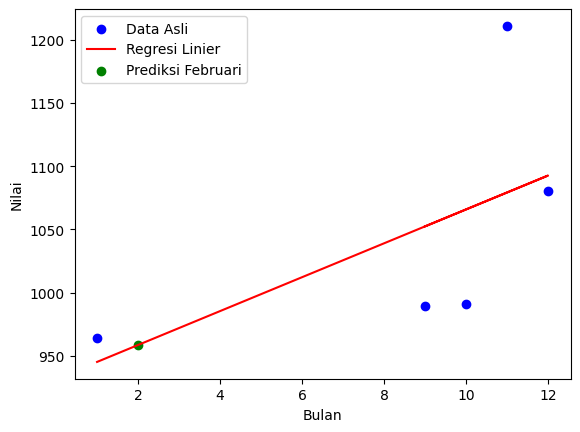

In [18]:
# Plotting data asli dan prediksi
plt.scatter(X, y, color='blue', label='Data Asli')
plt.plot(X, model.predict(X), color='red', label='Regresi Linier')
plt.scatter(2, february_prediction, color='green', label='Prediksi Februari')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.legend()
plt.show()